In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

# Загрузка датасета CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("Размеры обучающих данных:", X_train.shape, y_train.shape)
print("Размеры тестовых данных:", X_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Размеры обучающих данных: (50000, 32, 32, 3) (50000, 1)
Размеры тестовых данных: (10000, 32, 32, 3) (10000, 1)


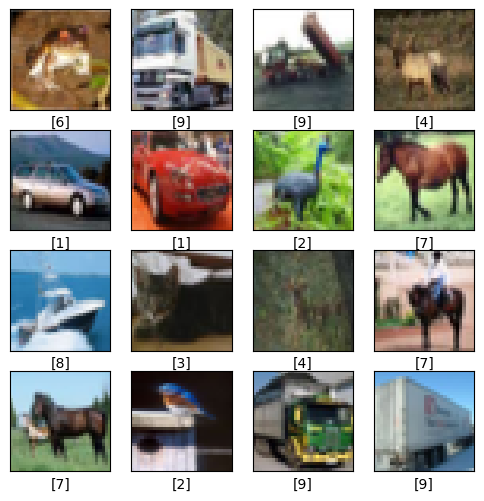

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])

In [6]:
# Нормализация входных изображений
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Преобразование меток классов в формат one-hot
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print("Пример после кодирования:", y_train_cat[0])


Пример после кодирования: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import models, layers

# Инициализация модели ResNet50
model = ResNet50(weights=None, input_shape=(32, 32, 3), classes=10)
model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [8]:
# Компиляция модели: оптимизатор, функция потерь, метрика
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 97s 37ms/step - accuracy: 0.2737 - loss: 2.4565 - val_accuracy: 0.1382 - val_loss: 13.8280
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.3064 - loss: 2.1340 - val_accuracy: 0.1724 - val_loss: 2.2756
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.2386 - loss: 2.3246 - val_accuracy: 0.1855 - val_loss: 4.8074
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.2388 - loss: 2.3039 - val_accuracy: 0.2545 - val_loss: 2.0120
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.2309 - loss: 2.2941 - val_accuracy: 0.1806 - val_loss: 16.1402
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.2632 - loss: 2.1285 - val_accuracy: 0.2801 - val_loss: 4.9135
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.3376 - loss: 1.9615 - val_accuracy: 0.2923 - val_loss: 9.0789
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.3584

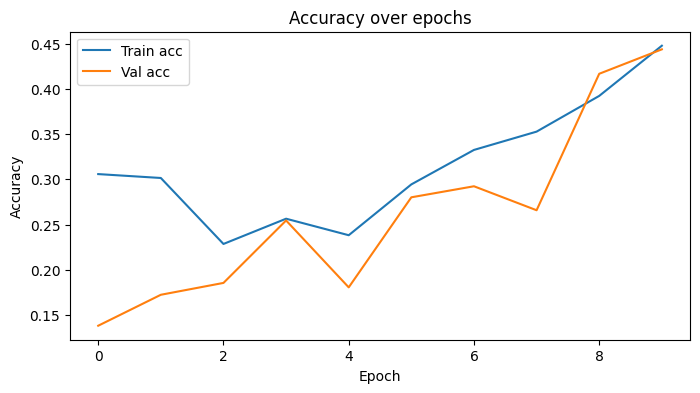

In [9]:


# Обучение модели на обучающей выборке
history = model.fit(X_train, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

# График изменения точности на обучении и проверке по эпохам
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


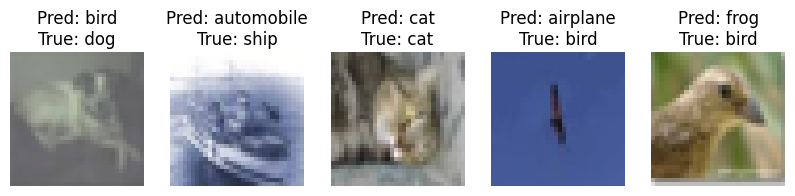

In [17]:
# Предсказание классов на тестовых изображениях
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = y_test.flatten()

# Словарь индексов классов в названия
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Выбор 5 случайных изображений из тестовой выборки
indices = np.random.choice(len(X_test), 5, replace=False)
plt.figure(figsize=(10, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_true[idx]]}")
    plt.axis('off')
plt.show()
